# Author: Sreeshma M

*Data Science and Business Analytics | The Sparks Foundation-GRIP*

### TASK 6 : Creating a Decision Tree classifier and visualising it graphically.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
iris = pd.read_csv(r'Desktop\TSF\Iris.csv')

In [43]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
iris.drop(['Id'],axis = 1, inplace = True)

In [46]:
iris.shape

(150, 5)

In [47]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:

iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**Data Visualisation** 

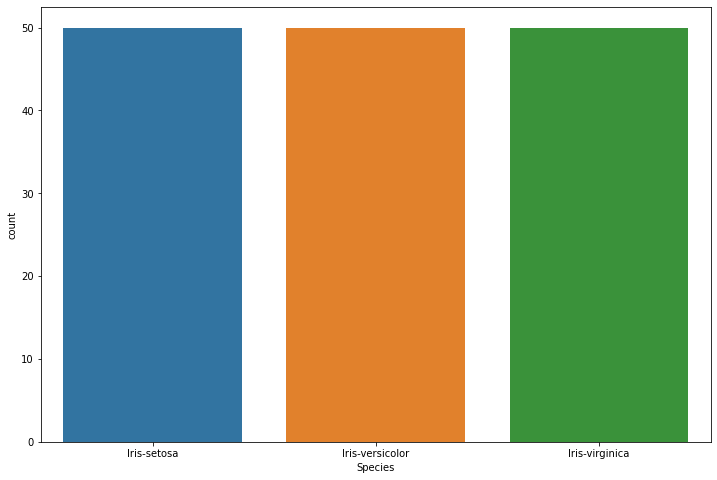

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=iris)

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

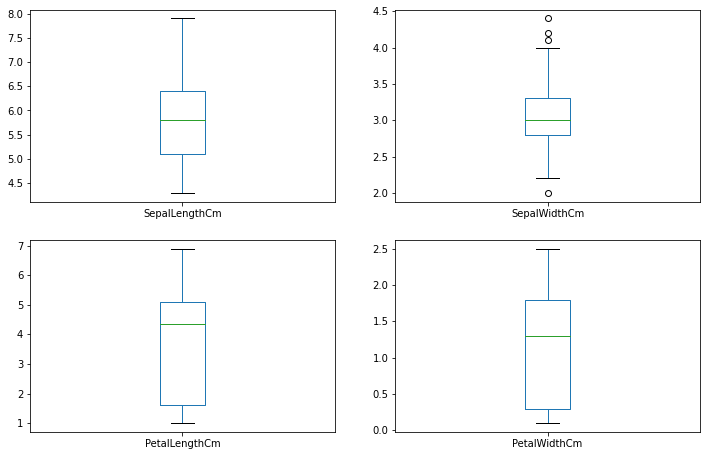

In [50]:
#Boxplot to check outliers
iris.plot(kind='box',subplots=True,layout=(3,2),figsize=(12,12),grid=False)

In [51]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


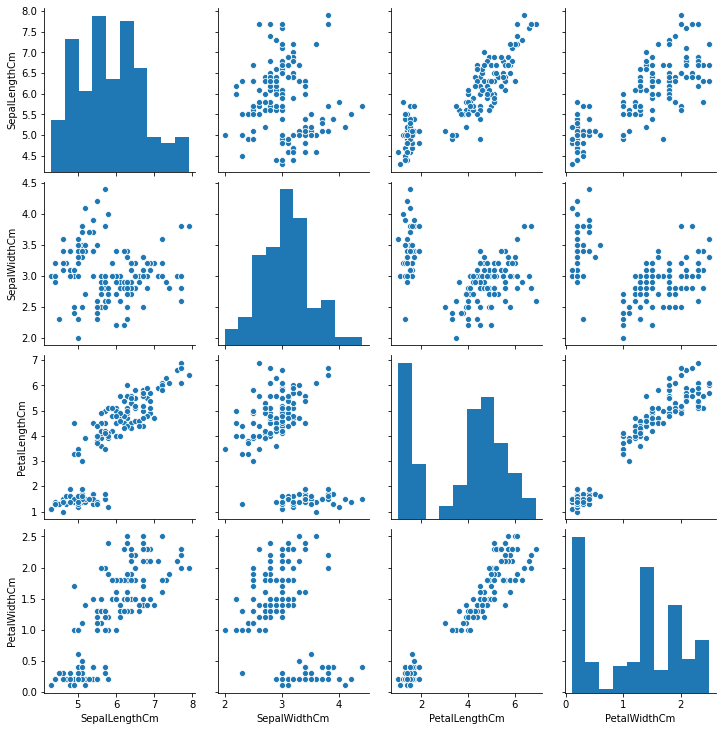

In [52]:
sns.pairplot(data=iris)

**Splitting the data into training and testing set**

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
x = iris.drop(['Species'],axis=1)
y = iris['Species']


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [56]:
from sklearn.tree import DecisionTreeClassifier


In [69]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
pred = dtree.predict(x_test)
pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [59]:
#compare original and predicted data
df = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
16,Iris-setosa,Iris-setosa
99,Iris-versicolor,Iris-versicolor
27,Iris-setosa,Iris-setosa
33,Iris-setosa,Iris-setosa
82,Iris-versicolor,Iris-versicolor


**Metric Evaluation**

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
pd.Series(pred).value_counts()

Iris-versicolor    18
Iris-virginica     15
Iris-setosa        12
dtype: int64

In [62]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.93      0.82      0.87        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.92      0.91      0.91        45



[[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]


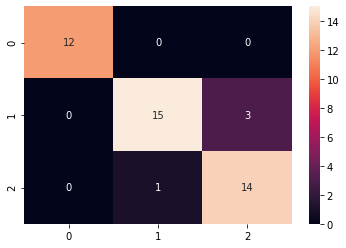

In [63]:
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(pred,y_test),annot = True)

In [64]:
np.mean(pred==y_test)

0.9111111111111111

In [67]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=6699bf02da86945a92fea333f3e687c10d609805daccdc91a37eb1edc155de34
  Stored in directory: c:\users\gb\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


[Text(1562.4, 2140.4249999999997, 'Petal_Length <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [38, 34, 33]\nclass = Iris-setosa'),
 Text(781.2, 1528.875, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Iris-setosa'),
 Text(2343.6000000000004, 1528.875, 'Petal_Width <= 1.75\ngini = 0.5\nsamples = 67\nvalue = [0, 34, 33]\nclass = Iris-versicolor'),
 Text(1562.4, 917.3249999999998, 'Petal_Length <= 5.35\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(781.2, 305.7750000000001, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(2343.6000000000004, 305.7750000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(3124.8, 917.3249999999998, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]\nclass = Iris-virginica')]

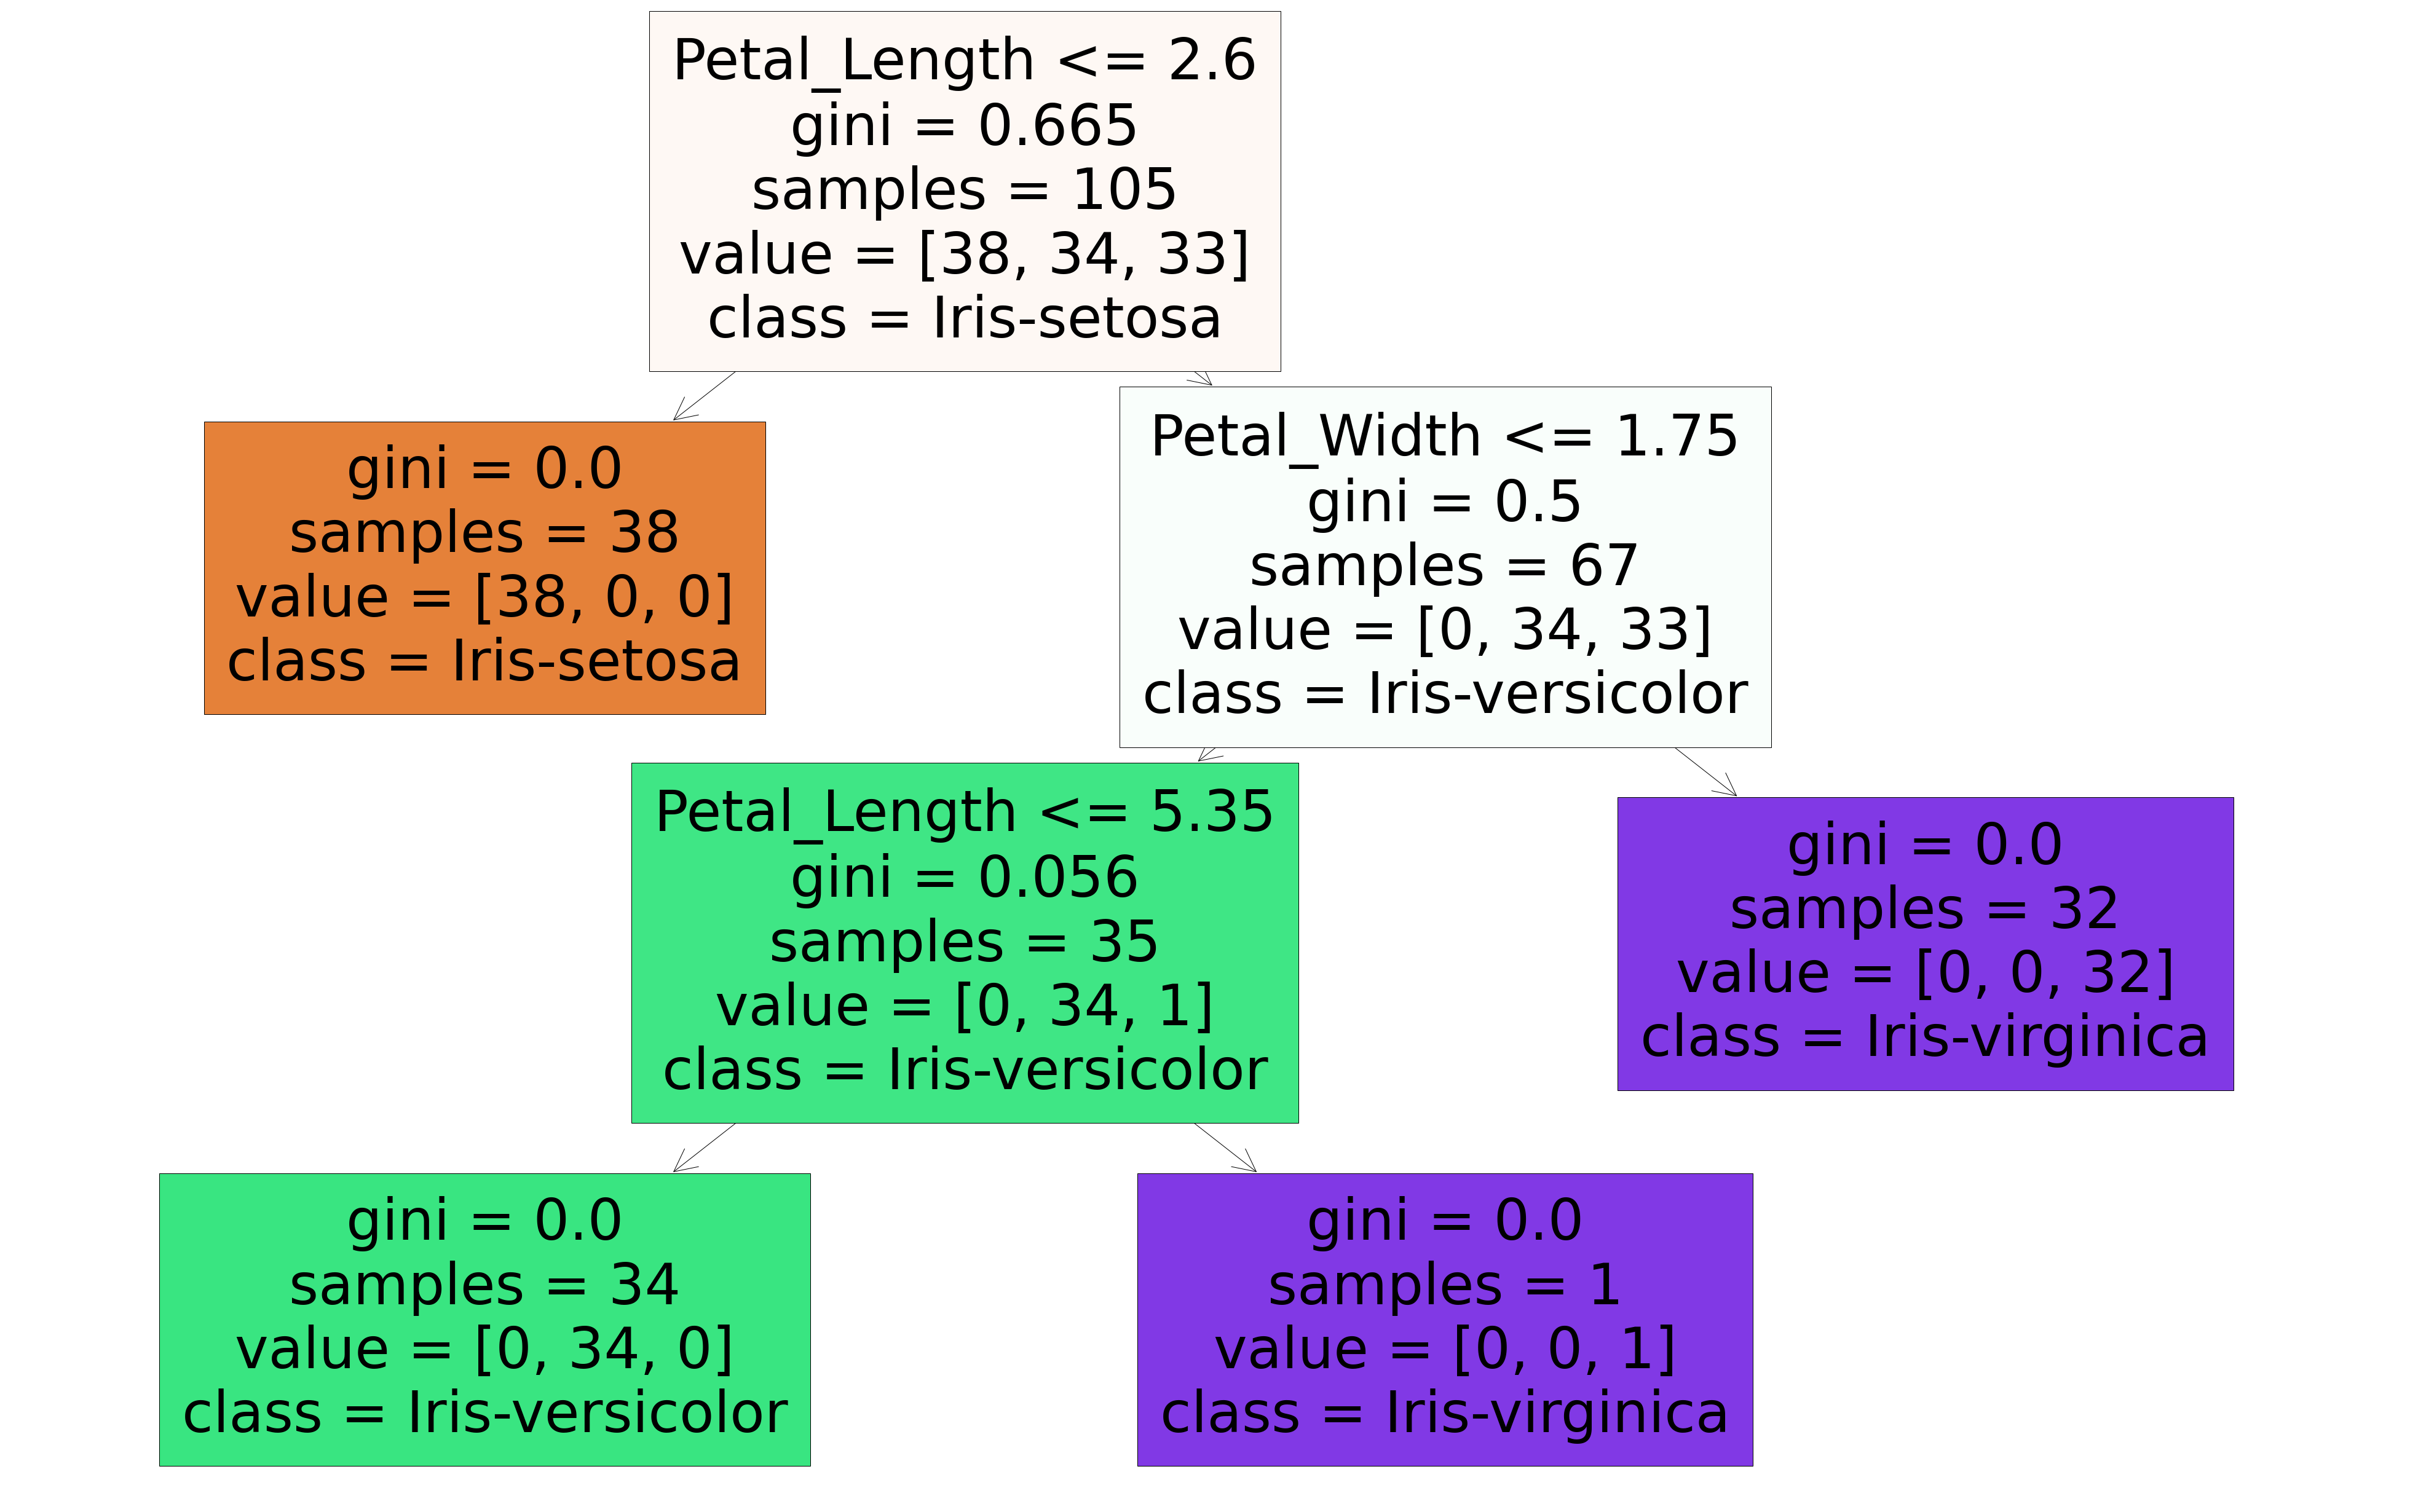

In [68]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
features_names=list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(dtree,feature_names=feature_names,class_names=class_names,filled=True)